In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
df = pd.read_csv("C:\\Users\\Ranna\\Documents\\excelR\\Project\\data.csv",encoding='latin1')
df

C:\Users\Ranna\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


member_id   loan_amnt       terms   batch_ID   Rate_of_intrst grade  \
0         58189336       14350  36 months                       19.19     E   
1         70011223        4800  36 months  BAT1586599           10.99     B   
2         70255675       10000  36 months  BAT1586599            7.26     A   
3          1893936       15000  36 months  BAT4808022           19.72     D   
4          7652106       16000  36 months  BAT2833642           10.64     B   
...            ...         ...        ...         ...             ...   ...   
887374    19145105       15000  36 months  BAT4217242            6.49     A   
887375    46304777       35000  60 months                       25.89     G   
887376      903745       14000  60 months  BAT6117184           17.51     E   
887377    53032475       20000  36 months  BAT3840785            7.26     A   
887378      994245        2700  60 months         NaN            7.49     A   

       sub_grade                    Emp_designation Experience home_ownership  \
0             E3                              clerk    9 years            OWN   
1             B4         Human Resources Specialist   < 1 year       MORTGAGE   
2             A4                             Driver    2 years            OWN   
3             D5  Us office of Personnel Management  10+ years           RENT   
4             B2        LAUSD-HOLLYWOOD HIGH SCHOOL  10+ years           RENT   
...          ...                                ...        ...            ...   
887374        A2              Network administrator     1 year       MORTGAGE   
887375        G3                Credit Risk Analyst     1 year            OWN   
887376        E4                   USPS/Nashua L&DC  10+ years            OWN   
887377        A4                  Computer Engineer   < 1 year       MORTGAGE   
887378        A4            Jimmy John's Sandwiches    2 years            OWN   

        ...  recoveries collection_recovery_fee collections_12_mths_ex_med  \
0       ...         0.0                     0.0                        0.0   
1       ...         0.0                     0.0                        0.0   
2       ...         0.0                     0.0                        0.0   
3       ...         0.0                     0.0                        0.0   
4       ...         0.0                     0.0                        0.0   
...     ...         ...                     ...                        ...   
887374  ...         0.0                     0.0                        0.0   
887375  ...         0.0                     0.0                        0.0   
887376  ...         0.0                     0.0                        0.0   
887377  ...         0.0                     0.0                        0.0   
887378  ...         0.0                     0.0                        0.0   

       mths_since_last_major_derog  application_type  \
0                             74.0        INDIVIDUAL   
1                              NaN        INDIVIDUAL   
2                              NaN        INDIVIDUAL   
3                              NaN        INDIVIDUAL   
4                              NaN        INDIVIDUAL   
...                            ...               ...   
887374                        77.0        INDIVIDUAL   
887375                         NaN        INDIVIDUAL   
887376                         NaN        INDIVIDUAL   
887377                         NaN        INDIVIDUAL   
887378                         NaN        INDIVIDUAL   

        verification_status_joint  last_week_pay  acc_now_delinq  \
0                             NaN      26th week             0.0   
1                             NaN       9th week             0.0   
2                             NaN       9th week             0.0   
3                             NaN     135th week             0.0   
4                             NaN      96th week             0.0   
...                           ...            ...             ...   


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 36 columns):
member_id                      887379 non-null int64
loan_amnt                      887379 non-null int64
terms                          887379 non-null object
batch_ID                       756631 non-null object
Rate_of_intrst                 887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
Emp_designation                835917 non-null object
Experience                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
purpose                        887379 non-null object
State                          887379 non-null object
debt_income_ratio              887379 non-null float64
delinq_2yrs                    887350 non-null float64
inq_last_6mths         

In [4]:
df.describe()

member_id      loan_amnt   Rate_of_intrst    annual_inc  \
count  8.873790e+05  887379.000000   887379.000000  8.873750e+05   
mean   3.500182e+07   14755.264605       13.246740  7.502759e+04   
std    2.411335e+07    8435.455601        4.381867  6.469830e+04   
min    7.047300e+04     500.000000        5.320000  0.000000e+00   
25%    1.087713e+07    8000.000000        9.990000  4.500000e+04   
50%    3.709528e+07   13000.000000       12.990000  6.500000e+04   
75%    5.847135e+07   20000.000000       16.200000  9.000000e+04   
max    7.354484e+07   35000.000000       28.990000  9.500000e+06   

       debt_income_ratio    delinq_2yrs  inq_last_6mths  \
count      887379.000000  887350.000000   887350.000000   
mean           18.157039       0.314442        0.694623   
std            17.190626       0.862244        0.998448   
min             0.000000       0.000000        0.000000   
25%            11.910000       0.000000        0.000000   
50%            17.650000       0.000000        0.000000   
75%            23.950000       0.000000        1.000000   
max          9999.000000      39.000000       33.000000   

       mths_since_last_delinq  mths_since_last_record    numb_credit  ...  \
count           433067.000000           137053.000000  887350.000000  ...   
mean                34.063798               70.117903      11.548469  ...   
std                 21.884940               28.127914       5.317313  ...   
min                  0.000000                0.000000       0.000000  ...   
25%                 15.000000               51.000000       8.000000  ...   
50%                 31.000000               70.000000      11.000000  ...   
75%                 50.000000               92.000000      14.000000  ...   
max                188.000000              129.000000      90.000000  ...   

       total_credits  total_rec_int  total_rec_late_fee     recoveries  \
count  887350.000000  887379.000000       887379.000000  887379.000000   
mean       25.268026    1754.804327            0.396692      45.919243   
std        11.840561    2095.356099            4.087825     409.693874   
min         1.000000       0.000000            0.000000       0.000000   
25%        17.000000     441.460000            0.000000       0.000000   
50%        24.000000    1073.280000            0.000000       0.000000   
75%        32.000000    2238.265000            0.000000       0.000000   
max       169.000000   24205.620000          358.680000   33520.270000   

       collection_recovery_fee  collections_12_mths_ex_med  \
count            887379.000000               887234.000000   
mean                  4.880757                    0.014380   
std                  63.125281                    0.134191   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    0.000000   
max                7002.190000                   20.000000   

       mths_since_last_major_derog  acc_now_delinq  tot_colle_amt  \
count                221703.000000   887350.000000   8.171030e+05   
mean                     44.104838        0.004991   2.257026e+02   
std                      22.179841        0.077625   1.031137e+04   
min                       0.000000        0.000000   0.000000e+00   
25%                      27.000000        0.000000   0.000000e+00   
50%                      44.000000        0.000000   0.000000e+00   
75%                      61.000000        0.000000   0.000000e+00   
max                     188.000000       14.000000   9.152545e+06   

       tot_curr_bal  
count  8.171030e+05  
mean   1.394582e+05  
std    1.537500e+05  
min    0.000000e+00  
25%    2.985300e+04  
50%    8.055900e+04  
75%    2.082050e+05  
max    8.000078e+06  

[8 rows x 22 columns]

In [5]:
df.isnull().sum()

member_id                           0
loan_amnt                           0
terms                               0
batch_ID                       130748
Rate_of_intrst                      0
grade                               0
sub_grade                           0
Emp_designation                 51462
Experience                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
purpose                             0
State                               0
debt_income_ratio                   0
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         454312
mths_since_last_record         750326
numb_credit                        29
pub_rec                            29
total revol_bal                     0
total_credits                      29
initial_list_status                 0
total_rec_int                       0
total_rec_late_fee                  0
recoveries  

In [6]:
df.columns

Index(['member_id ', 'loan_amnt ', 'terms', 'batch_ID ', 'Rate_of_intrst',
       'grade', 'sub_grade', 'Emp_designation', 'Experience', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'State',
       'debt_income_ratio', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'numb_credit',
       'pub_rec', 'total revol_bal', 'total_credits', 'initial_list_status',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type',
       'verification_status_joint', 'last_week_pay', 'acc_now_delinq',
       'tot_colle_amt', 'tot_curr_bal'],
      dtype='object')

In [7]:
### value counts of all columns 
pieces = []
for col in df.columns:
    tmp_series = df[col].value_counts()
    tmp_series.name = col
    pieces.append(tmp_series)
df_value_counts = pd.concat(pieces, axis=1)

pieces

[58732538    1
 9606920     1
 1187609     1
 34762519    1
 70418197    1
            ..
 65666960    1
 17373069    1
 40443788    1
 610182      1
 58720256    1
 Name: member_id , Length: 887379, dtype: int64, 10000    61837
 12000    50183
 15000    47210
 20000    46932
 35000    36368
          ...  
 750          1
 550          1
 925          1
 850          1
 950          1
 Name: loan_amnt , Length: 1372, dtype: int64, 36 months    621125
 60 months    266254
 Name: terms, dtype: int64,               234087
 BAT2252229     18791
 BAT3873588     17839
 BAT2803411     17111
 BAT2078974     14859
                ...  
 BAT2331079        13
 BAT6671483        10
 BAT3411179         9
 BAT3966851         8
 BAT6027836         7
 Name: batch_ID , Length: 207, dtype: int64, 10.99    34624
 9.17     25720
 15.61    25201
 9.99     21553
 7.89     20311
          ...  
 14.28        1
 24.40        1
 18.72        1
 17.46        1
 17.41        1
 Name: Rate_of_intrst, Length: 542

In [8]:
df.drop(df.columns[[0,3,5,6,7,9,11,12,13,23,30,31,32]],axis=1,inplace= True)

In [9]:
df.shape

(887379, 23)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 23 columns):
loan_amnt                      887379 non-null int64
terms                          887379 non-null object
Rate_of_intrst                 887379 non-null float64
Experience                     842554 non-null object
annual_inc                     887375 non-null float64
debt_income_ratio              887379 non-null float64
delinq_2yrs                    887350 non-null float64
inq_last_6mths                 887350 non-null float64
mths_since_last_delinq         433067 non-null float64
mths_since_last_record         137053 non-null float64
numb_credit                    887350 non-null float64
pub_rec                        887350 non-null float64
total revol_bal                887379 non-null float64
total_credits                  887350 non-null float64
total_rec_int                  887379 non-null float64
total_rec_late_fee             887379 non-null float64
recoveries   

In [11]:
## renaming columns
df.rename(columns={"loan_amnt ":"loan_amnt"},inplace=True)
df.rename(columns={"total revol_bal":"total_revol_bal"},inplace=True)

## converting data type
df['loan_amnt'] = df['loan_amnt'].astype(float)

# removing months word from terms column
df['terms'] = df['terms'].astype(str).str.rstrip(' months')
df['terms'] = df['terms'].astype(float)

df['Experience'] = df['Experience'].astype(str).str.lstrip('<').str.rstrip('+ years')
df['Experience'] = df['Experience'].astype(float)

In [12]:
df.Experience = df.Experience.fillna(df.Experience.median())

# filling with mean
df.annual_inc = df.annual_inc.fillna(df.annual_inc.mean())
df.delinq_2yrs = df.delinq_2yrs.fillna(df.delinq_2yrs.mean())
df.inq_last_6mths = df.inq_last_6mths.fillna(df.inq_last_6mths.mean())
df.numb_credit = df.numb_credit.fillna(df.numb_credit.mean())
df.total_credits = df.total_credits.fillna(df.total_credits.mean())
df.pub_rec = df.pub_rec.fillna(df.pub_rec.mean())
df.collections_12_mths_ex_med = df.collections_12_mths_ex_med.fillna(df.collections_12_mths_ex_med.mean())
df.tot_colle_amt = df.tot_colle_amt.fillna(df.tot_colle_amt.mean())
df.tot_curr_bal = df.tot_curr_bal.fillna(df.tot_curr_bal.mean())
df.acc_now_delinq = df.acc_now_delinq.fillna(df.acc_now_delinq.mean())

# filling with 0, assuming that maybe no dilinquency was committed and no public record were made and no derogatories were filed
df.mths_since_last_delinq = df.mths_since_last_delinq.fillna(0)
df.mths_since_last_record = df.mths_since_last_record.fillna(0)
df.mths_since_last_major_derog = df.mths_since_last_major_derog.fillna(0)

# **EDA**

C:\Users\Ranna\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Ranna\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Ranna\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Ranna\Anaconda3\lib\site-packages\pandas\plotting\_matpl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C181FA9C8>,
      dtype=object)

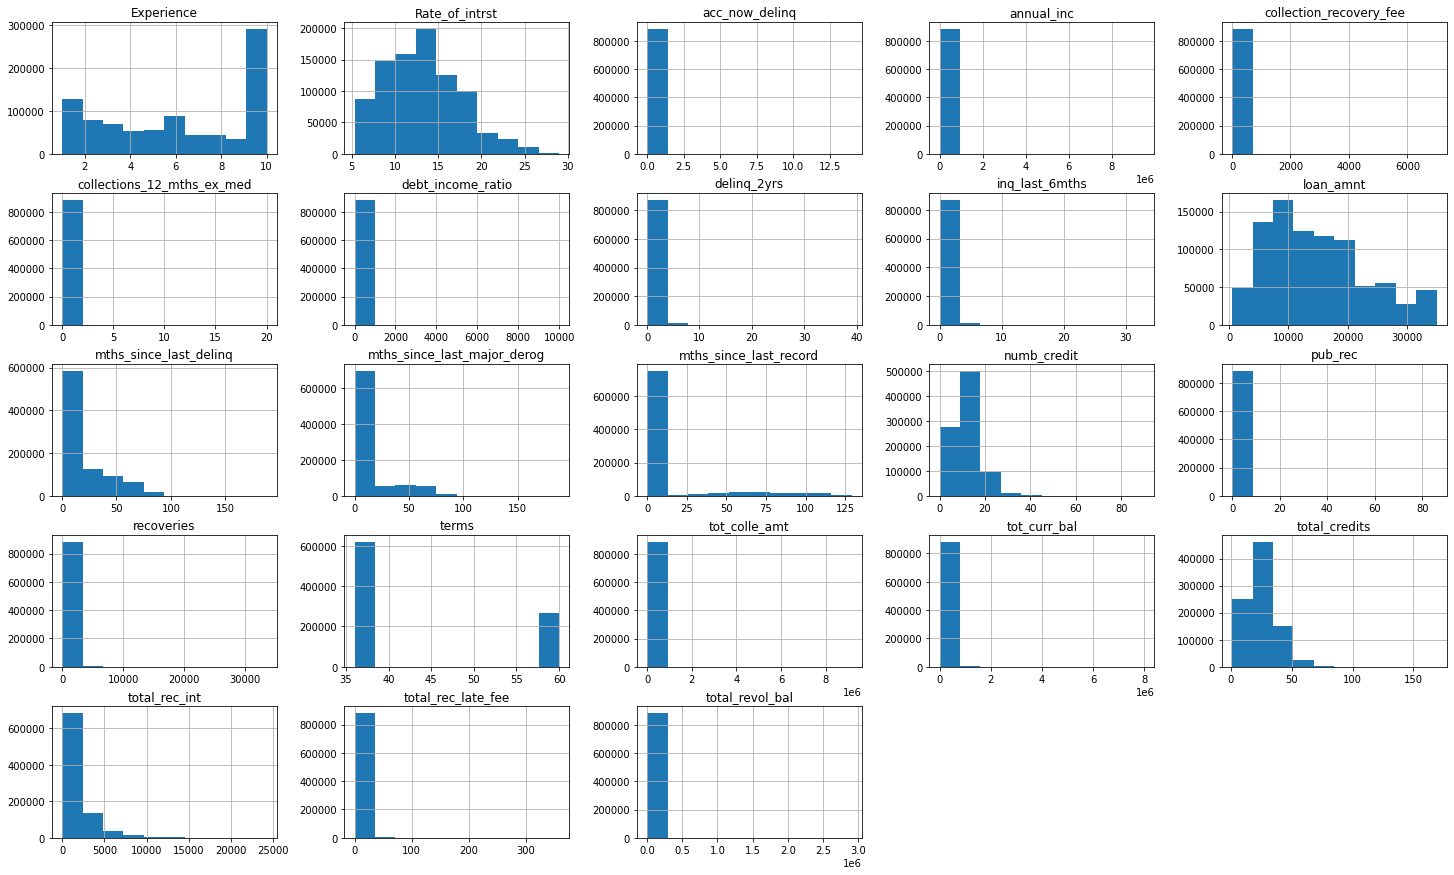

In [26]:
df.hist(bins=10, figsize=(25, 15))

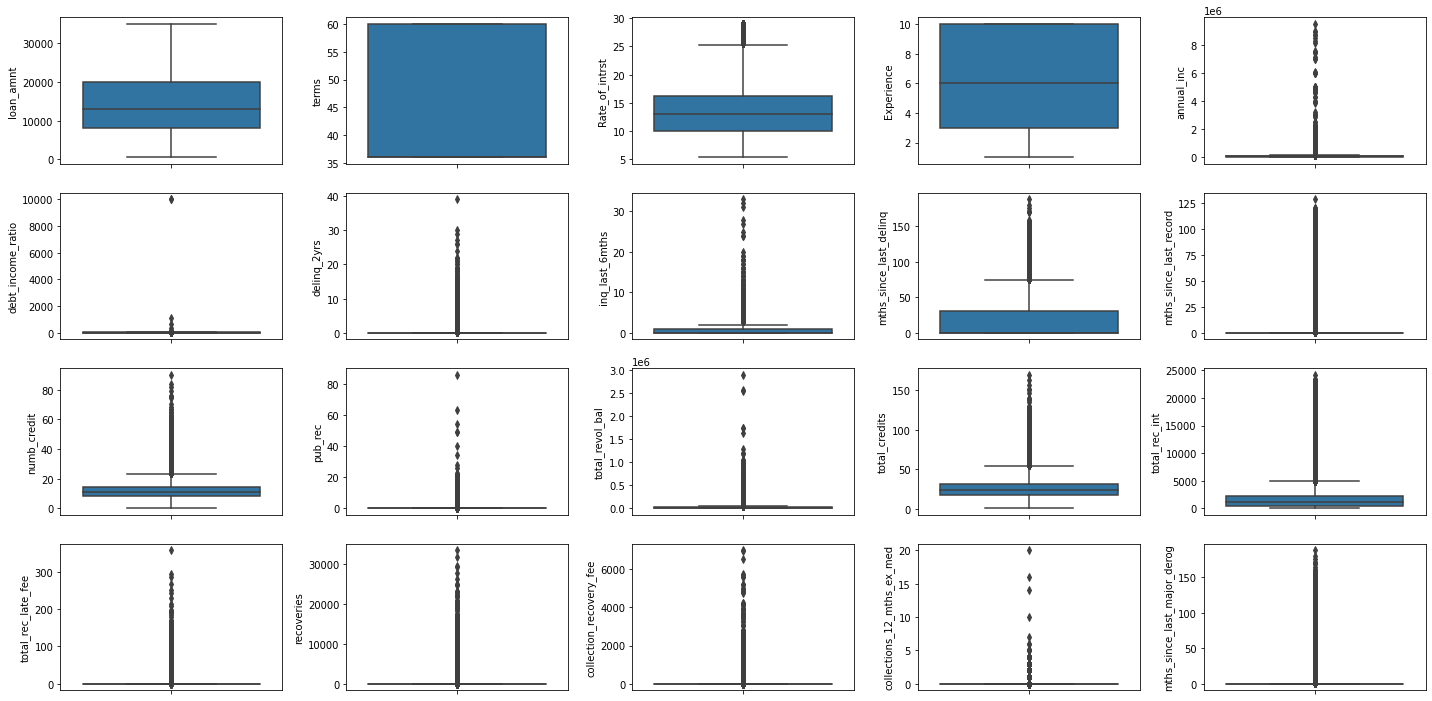

In [13]:
# Set figsize here
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x= df.iloc[:, i],  orient='v' , ax=ax)

fig.tight_layout()

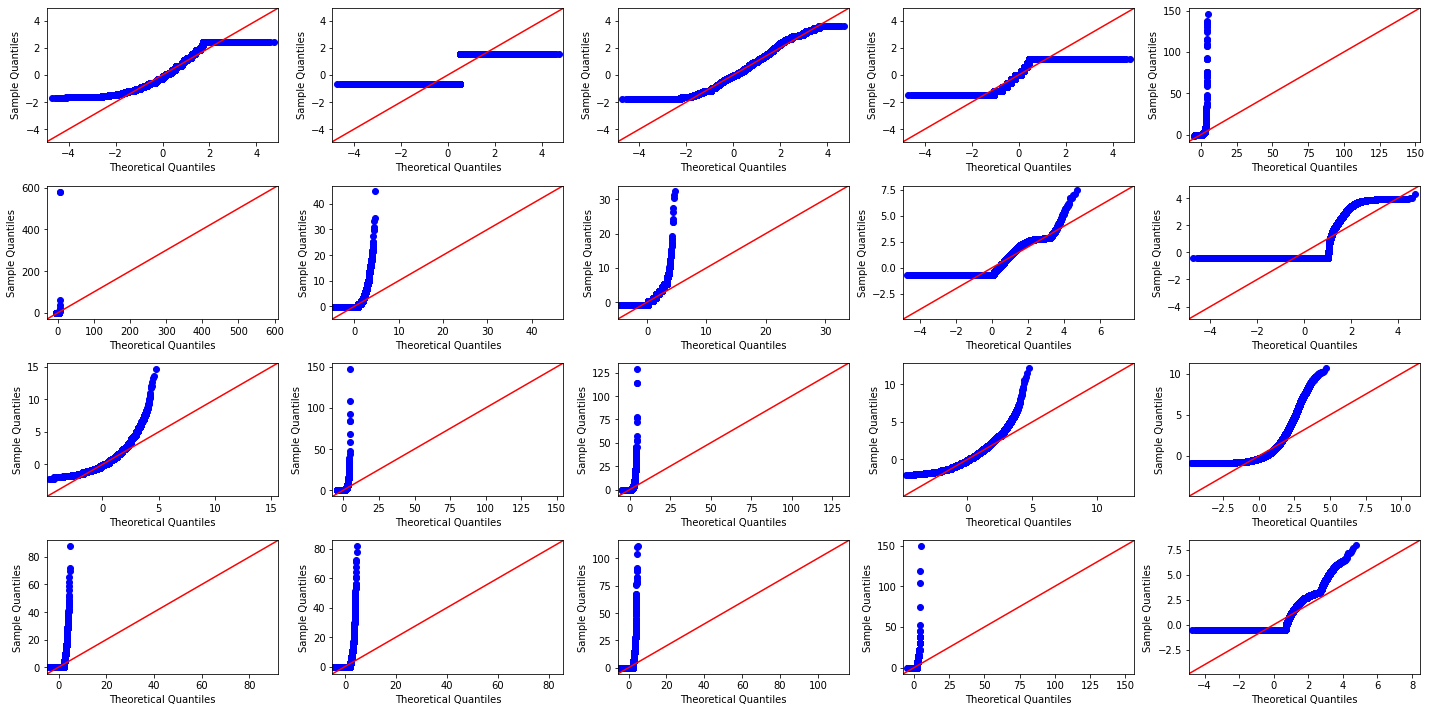

In [14]:
import statsmodels.api as sm
# Set figsize here
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    sm.graphics.qqplot(df.iloc[:, i],fit=True,line="45", ax=ax)

fig.tight_layout()

In [15]:
cols_cat = ['loan_amnt', 'terms', 'Rate_of_intrst', 'Experience', 'annual_inc',
            'debt_income_ratio', 'delinq_2yrs', 'inq_last_6mths','mths_since_last_delinq', 'mths_since_last_record',
            'numb_credit','pub_rec', 'total revol_bal', 'total_credits', 'total_rec_int',
            'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','collections_12_mths_ex_med', 'mths_since_last_major_derog',
            'last_week_pay', 'acc_now_delinq', 'tot_colle_amt', 'tot_curr_bal','initial_list_status_Cat']

In [16]:
def display_multi_boxplots(start_feature_name, row, col):
    with plt.style.context(('seaborn-white')):
        f, axes = plt.subplots(row, col, figsize=(3*col, 4*row), sharey=True)

        nums = row*col
        start_idx = cols_cat.index(start_feature_name)

        for num, ax in zip(range(nums), axes.flat):
            try:
                sns.boxplot(x=df[cols_cat[start_idx + num]], y=df['total_revol_bal'], palette="Set3", ax=ax)
            except:
                pass

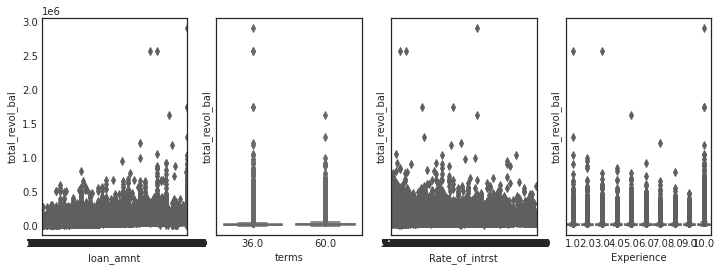

In [17]:
display_multi_boxplots('loan_amnt', 1, 4)

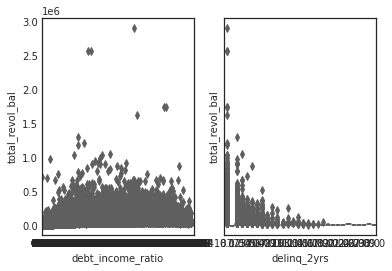

In [18]:
display_multi_boxplots('debt_income_ratio', 1, 2)

In [19]:
df.values.reshape(-1,1)
x = df[['loan_amnt', 'terms', 'Rate_of_intrst', 'Experience', 'annual_inc','debt_income_ratio', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'numb_credit',
       'pub_rec', 'total_credits', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_colle_amt', 'tot_curr_bal']]
y = df[['total_revol_bal']]

# **Feature Engineering**

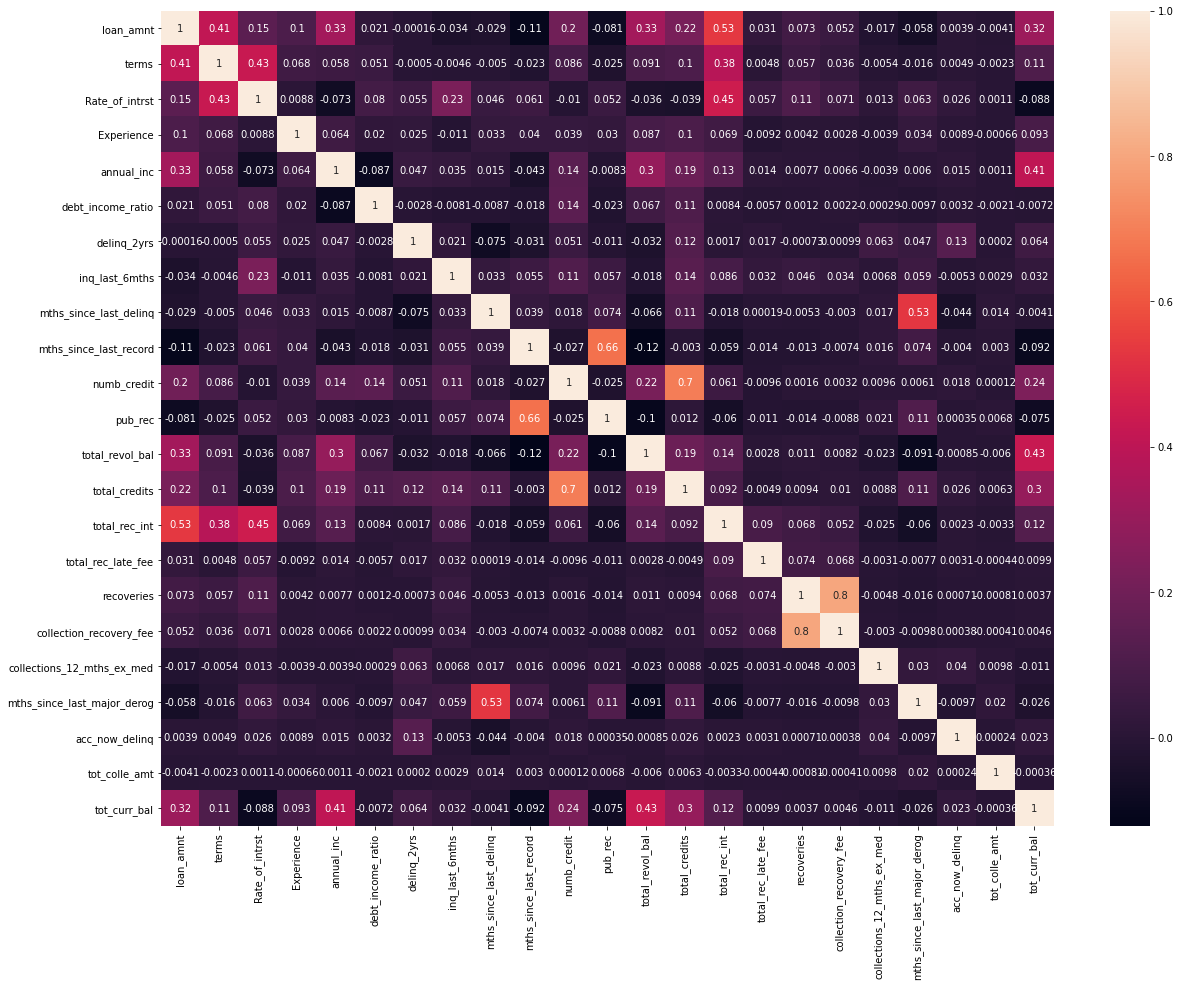

In [20]:
corr_matrix = df.corr()
corr_matrix['total_revol_bal'].sort_values(ascending=False)

f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, 
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values, annot = True)
plt.show()


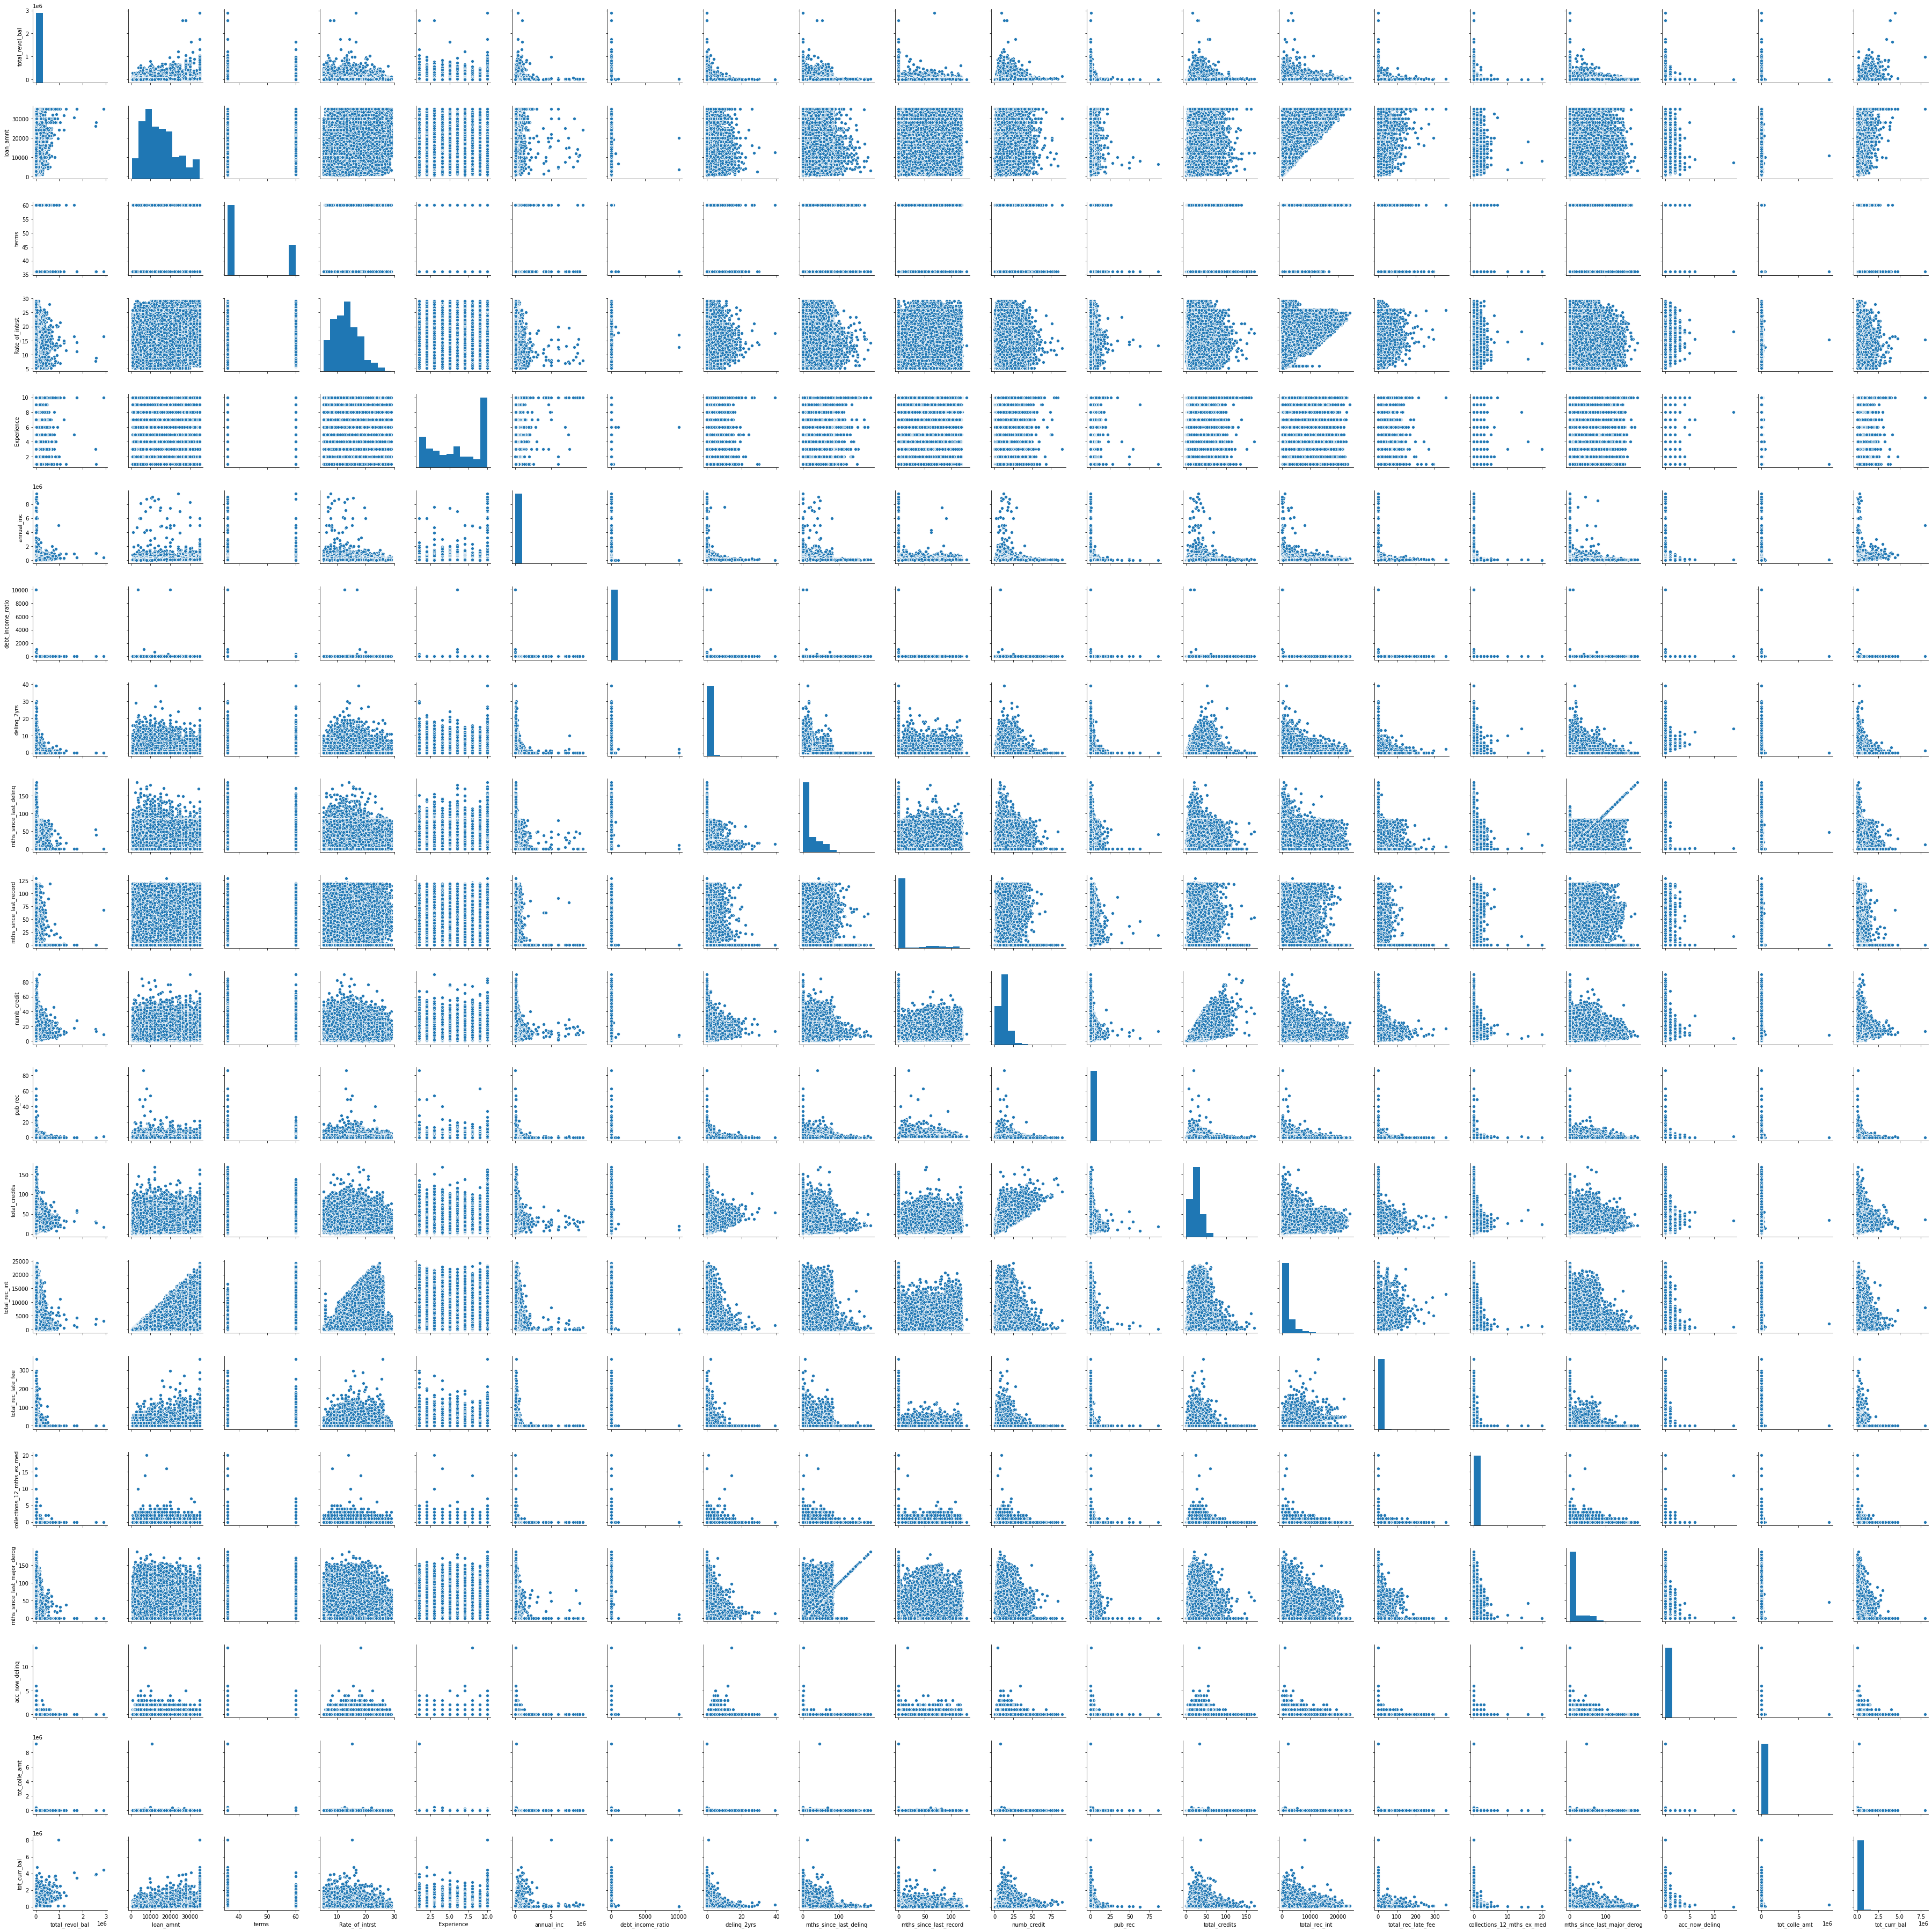

In [21]:
sns.pairplot(pd.concat([df['total_revol_bal'], df[['loan_amnt', 'terms', 'Rate_of_intrst', 'Experience', 'annual_inc','debt_income_ratio', 'delinq_2yrs', 
       'mths_since_last_delinq', 'mths_since_last_record', 'numb_credit','pub_rec', 'total_credits', 'total_rec_int',
       'total_rec_late_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog','acc_now_delinq', 'tot_colle_amt', 
       'tot_curr_bal']]], axis = 1))

In [22]:
def forward_regression(x, y,
                       initial_list=[], 
                       threshold_in=0.02, 
                       threshold_out = 0.05, 
                       verbose=True):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add   with p-value '.format(best_feature, best_pval))

        if not changed:
            break

    return included


forward_regression(x, y)

C:\Users\Ranna\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Ranna\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add   with p-value 
Add   with p-value 
Add   with p-value 
Add   with p-value 
Add   with p-value 
Add   with p-value 
Add   with p-value 
Add   with p-value 
Add   with p-value 
Add   with p-value 
Add   with p-value 
Add   with p-value 
Add   with p-value 
Add   with p-value 
Add   with p-value 
Add   with p-value 
Add   with p-value 
Add   with p-value 
Add   with p-value 
Add   with p-value 
Add   with p-value 


['mths_since_last_delinq',
 'terms',
 'tot_curr_bal',
 'total_credits',
 'inq_last_6mths',
 'annual_inc',
 'delinq_2yrs',
 'pub_rec',
 'mths_since_last_major_derog',
 'numb_credit',
 'total_rec_int',
 'loan_amnt',
 'debt_income_ratio',
 'mths_since_last_record',
 'Experience',
 'collections_12_mths_ex_med',
 'Rate_of_intrst',
 'acc_now_delinq',
 'total_rec_late_fee',
 'tot_colle_amt',
 'recoveries']

In [23]:
def backward_regression(x, y,
                           initial_list=[], 
                           threshold_in=0.04, 
                           threshold_out = 0.05, 
                           verbose=True):
    included=list(x.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop  with p-value '.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

backward_regression(x,y)

Drop  with p-value 


['loan_amnt',
 'terms',
 'Rate_of_intrst',
 'Experience',
 'annual_inc',
 'debt_income_ratio',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'numb_credit',
 'pub_rec',
 'total_credits',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_colle_amt',
 'tot_curr_bal']

In [24]:
#RECURSIVE FEATURE ELIMINATION
#Feature ranking with recursive feature elimination and cross-validated selection of the best number of features
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
#X = X_train
#y = Y_train
names=pd.DataFrame(x.columns)

#use linear regression as the model
lin_reg = LinearRegression()

#This is to select 5 variables: can be changed and checked in model for accuracy
rfe_mod = RFE(lin_reg, 10, step=1) #RFECV(lin_reg, step=1, cv=5) 
myvalues=rfe_mod.fit(x,y) #to fit
myvalues.support_#The mask of selected features.
myvalues.ranking_ #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame
rankings

#Concat and name columns
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

#Select most important (Only 1's)
most_important = ranked.loc[ranked['Rank'] ==1] 
print(most_important)

most_important['Rank'].count()

C:\Users\Ranna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                        Feature  Rank
1                         terms     1
2                Rate_of_intrst     1
3                    Experience     1
6                   delinq_2yrs     1
7                inq_last_6mths     1
10                  numb_credit     1
11                      pub_rec     1
12                total_credits     1
17   collections_12_mths_ex_med     1
18  mths_since_last_major_derog     1


10

In [25]:
#UNIVARIATE SELECTION
# Feature Extraction with Univariate Statistical Tests (f_regression)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.datasets import load_digits

# load data
#X = X_train
#y = Y_train
names=pd.DataFrame(x.columns)

model = SelectKBest(score_func=f_regression, k=4)
results = model.fit(x, y)

print (results.scores_)
#print (results.pvalues_)

results_df=pd.DataFrame(results.scores_)
#Concat and name columns
scored=pd.concat([names,results_df], axis=1)
scored.columns = ["Feature", "Score"]
scored.sort_values(by=['Score']).head(30)

[1.11106907e+05 7.42644189e+03 1.13291026e+03 6.76074307e+03
 8.50778977e+04 4.03473711e+03 9.37471517e+02 2.73570192e+02
 3.90527068e+03 1.32727069e+04 4.71153731e+04 9.07394706e+03
 3.29094447e+04 1.70697770e+04 6.82722693e+00 1.04060277e+02
 5.89602413e+01 4.63556759e+02 7.41998647e+03 6.48532419e-01
 3.23357003e+01 2.00176926e+05]


C:\Users\Ranna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature          Score
19               acc_now_delinq       0.648532
14           total_rec_late_fee       6.827227
20                tot_colle_amt      32.335700
16      collection_recovery_fee      58.960241
15                   recoveries     104.060277
7                inq_last_6mths     273.570192
17   collections_12_mths_ex_med     463.556759
6                   delinq_2yrs     937.471517
2                Rate_of_intrst    1132.910262
8        mths_since_last_delinq    3905.270684
5             debt_income_ratio    4034.737106
3                    Experience    6760.743072
18  mths_since_last_major_derog    7419.986472
1                         terms    7426.441894
11                      pub_rec    9073.947059
9        mths_since_last_record   13272.706923
13                total_rec_int   17069.777019
12                total_credits   32909.444696
10                  numb_credit   47115.373114
4                    annual_inc   85077.897744
0                     loan_amnt  111106.906759
21                 tot_curr_bal  200176.925982

In [27]:
m1 = smf.ols("total_revol_bal~ tot_curr_bal + loan_amnt + annual_inc + numb_credit + total_credits + total_rec_int + mths_since_last_record", data=df).fit()
m1.summary()# 0.252

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_revol_bal   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                 4.261e+04
Date:                Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                        00:36:32   Log-Likelihood:            -1.0020e+07
No. Observations:              887379   AIC:                         2.004e+07
Df Residuals:                  887371   BIC:                         2.004e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -2747.4163     60.203    -45.636      0.000   -2865.412   -2629.420
tot_curr_bal               0.0471      0.000    293.136      0.000       0.047       0.047
loan_amnt                  0.5164      0.003    164.336      0.000       0.510       0.523
annual_inc                 0.0339      0.000     94.302      0.000       0.033       0.035
numb_credit              597.8634      5.408    110.549      0.000     587.264     608.463
total_credits           -116.6806      2.477    -47.101      0.000    -121.536    -111.825
total_rec_int             -0.2507      0.012    -21.487      0.000      -0.274      -0.228
mths_since_last_record   -53.2714      0.752    -70.878      0.000     -54.745     -51.798
==============================================================================
Omnibus:                  1845252.020   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      53839632626.105
Skew:                          16.954   Prob(JB):                         0.00
Kurtosis:                    1209.231   Cond. No.                     6.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
m2 = smf.ols("total_revol_bal~ tot_curr_bal + loan_amnt + annual_inc + numb_credit + total_credits + total_rec_int + mths_since_last_record+pub_rec+terms+mths_since_last_major_derog+Experience+debt_income_ratio+mths_since_last_delinq+delinq_2yrs+collections_12_mths_ex_med+recoveries+tot_colle_amt+total_rec_late_fee+acc_now_delinq", data=df).fit()
m2.summary()# 0.266

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_revol_bal   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                 1.695e+04
Date:                Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                        00:36:42   Log-Likelihood:            -1.0012e+07
No. Observations:              887379   AIC:                         2.002e+07
Df Residuals:                  887359   BIC:                         2.002e+07
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -1322.3530    100.811    -13.117      0.000   -1519.939   -1124.767
tot_curr_bal                    0.0467      0.000    292.423      0.000       0.046       0.047
loan_amnt                       0.5160      0.003    159.307      0.000       0.510       0.522
annual_inc                      0.0367      0.000    102.067      0.000       0.036       0.037
numb_credit                   517.5426      5.418     95.516      0.000     506.923     528.162
total_credits                 -75.1664      2.515    -29.888      0.000     -80.096     -70.237
total_rec_int                  -0.1870      0.012    -15.740      0.000      -0.210      -0.164
mths_since_last_record        -43.1493      0.991    -43.529      0.000     -45.092     -41.206
pub_rec                      -646.2672     47.103    -13.720      0.000    -738.588    -553.947
terms                         -72.5740      2.093    -34.667      0.000     -76.677     -68.471
mths_since_last_major_derog   -42.4345      1.106    -38.372      0.000     -44.602     -40.267
Experience                    259.0713      5.998     43.191      0.000     247.315     270.828
debt_income_ratio              78.5561      1.208     65.010      0.000      76.188      80.924
mths_since_last_delinq        -38.2394      1.064    -35.924      0.000     -40.326     -36.153
delinq_2yrs                 -1575.9084     24.353    -64.711      0.000   -1623.640   -1528.177
collections_12_mths_ex_med  -1657.2811    152.523    -10.866      0.000   -1956.221   -1358.342
recoveries                     -0.2034      0.050     -4.060      0.000      -0.302      -0.105
tot_colle_amt                  -0.0074      0.002     -3.578      0.000      -0.011      -0.003
total_rec_late_fee            -23.2905      5.026     -4.634      0.000     -33.142     -13.439
acc_now_delinq              -1685.1692    265.328     -6.351      0.000   -2205.204   -1165.135
==============================================================================
Omnibus:                  1857455.079   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      58528625785.911
Skew:                          17.202   Prob(JB):                         0.00
Kurtosis:                    1260.688   Cond. No.                     2.82e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
m3 = smf.ols("np.sqrt(total_revol_bal)~ np.sqrt(tot_curr_bal) + np.sqrt(loan_amnt) + np.sqrt(annual_inc) + np.sqrt(numb_credit) + np.sqrt(total_credits) + np.sqrt(total_rec_int) + np.sqrt(mths_since_last_record)", data=df).fit()
m3.summary()# 0.347

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.sqrt(total_revol_bal)   R-squared:                       0.347
Model:                                  OLS   Adj. R-squared:                  0.347
Method:                       Least Squares   F-statistic:                 6.743e+04
Date:                      Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                              00:36:48   Log-Likelihood:            -4.6535e+06
No. Observations:                    887379   AIC:                         9.307e+06
Df Residuals:                        887371   BIC:                         9.307e+06
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         -23.6524      0.273    -86.727      0.000     -24.187     -23.118
np.sqrt(tot_curr_bal)               0.0620      0.000    186.004      0.000       0.061       0.063
np.sqrt(loan_amnt)                  0.4339      0.002    229.966      0.000       0.430       0.438
np.sqrt(annual_inc)                 0.1183      0.001    144.877      0.000       0.117       0.120
np.sqrt(numb_credit)               17.5102      0.092    190.996      0.000      17.330      17.690
np.sqrt(total_credits)             -3.2264      0.061    -52.935      0.000      -3.346      -3.107
np.sqrt(total_rec_int)             -0.0205      0.003     -7.338      0.000      -0.026      -0.015
np.sqrt(mths_since_last_record)    -2.1980      0.016   -135.496      0.000      -2.230      -2.166
==============================================================================
Omnibus:                   414179.943   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9039203.902
Skew:                           1.747   Prob(JB):                         0.00
Kurtosis:                      18.240   Cond. No.                     2.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
m4 = smf.ols("np.sqrt(total_revol_bal)~ np.sqrt(tot_curr_bal)+(tot_curr_bal*tot_curr_bal) + loan_amnt+(loan_amnt*loan_amnt) + np.sqrt(annual_inc) +(annual_inc*annual_inc)+ np.sqrt(numb_credit)+(numb_credit*numb_credit) + np.sqrt(total_credits)+(total_credits*total_credits) + np.sqrt(total_rec_int)+(total_rec_int*total_rec_int) + np.sqrt(mths_since_last_record)+(mths_since_last_record*mths_since_last_record)", data=df).fit()
m4.summary()# 0.364

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.sqrt(total_revol_bal)   R-squared:                       0.364
Model:                                  OLS   Adj. R-squared:                  0.364
Method:                       Least Squares   F-statistic:                 3.902e+04
Date:                      Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                              00:37:19   Log-Likelihood:            -4.6422e+06
No. Observations:                    887379   AIC:                         9.284e+06
Df Residuals:                        887365   BIC:                         9.285e+06
Df Model:                                13                                         
Covariance Type:                  nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         -29.5729      0.779    -37.954      0.000     -31.100     -28.046
np.sqrt(tot_curr_bal)              -0.0459      0.001    -50.447      0.000      -0.048      -0.044
tot_curr_bal                        0.0001   1.08e-06    123.258      0.000       0.000       0.000
loan_amnt                           0.0019   7.93e-06    233.820      0.000       0.002       0.002
np.sqrt(annual_inc)                 0.1314      0.001     92.092      0.000       0.129       0.134
annual_inc                      -4.371e-05   1.45e-06    -30.044      0.000   -4.66e-05   -4.09e-05
np.sqrt(numb_credit)               28.7585      0.472     60.886      0.000      27.833      29.684
numb_credit                        -1.6167      0.066    -24.488      0.000      -1.746      -1.487
np.sqrt(total_credits)              6.4358      0.308     20.867      0.000       5.831       7.040
total_credits                      -0.8547      0.030    -28.578      0.000      -0.913      -0.796
np.sqrt(total_rec_int)              0.0914      0.007     12.983      0.000       0.078       0.105
total_rec_int                      -0.0012   6.95e-05    -17.402      0.000      -0.001      -0.001
np.sqrt(mths_since_last_record)    -7.5193      0.093    -80.465      0.000      -7.702      -7.336
mths_since_last_record              0.5811      0.010     56.744      0.000       0.561       0.601
==============================================================================
Omnibus:                   351867.123   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5346474.816
Skew:                           1.500   Prob(JB):                         0.00
Kurtosis:                      14.645   Cond. No.                     3.75e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
m5 = smf.ols("np.sqrt(total_revol_bal)~ np.sqrt(tot_curr_bal)+(tot_curr_bal*tot_curr_bal) + loan_amnt+(loan_amnt*loan_amnt) + np.sqrt(annual_inc) +(annual_inc*annual_inc)+ np.sqrt(numb_credit)+(numb_credit*numb_credit) + np.sqrt(total_credits)+(total_credits*total_credits) + np.sqrt(total_rec_int)+(total_rec_int*total_rec_int) + np.sqrt(mths_since_last_record)+(mths_since_last_record*mths_since_last_record)+np.sqrt(pub_rec)+np.sqrt(terms)+(terms*terms)+np.sqrt(mths_since_last_major_derog)+(mths_since_last_major_derog*mths_since_last_major_derog)+np.sqrt(Experience)+(Experience*Experience)+np.sqrt(debt_income_ratio)+(debt_income_ratio*debt_income_ratio)+np.sqrt(mths_since_last_delinq)+(mths_since_last_delinq*mths_since_last_delinq)+np.sqrt(Rate_of_intrst)+(Rate_of_intrst*Rate_of_intrst)+np.sqrt(delinq_2yrs)+(delinq_2yrs*delinq_2yrs)+np.sqrt(collections_12_mths_ex_med)+np.sqrt(tot_colle_amt)+(tot_colle_amt*tot_colle_amt)+np.sqrt(total_rec_late_fee)+np.sqrt(acc_now_delinq)+(acc_now_delinq*acc_now_delinq)", data=df).fit()
m5.summary()# 0.44

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.sqrt(total_revol_bal)   R-squared:                       0.440
Model:                                  OLS   Adj. R-squared:                  0.440
Method:                       Least Squares   F-statistic:                 2.111e+04
Date:                      Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                              00:37:30   Log-Likelihood:            -4.5857e+06
No. Observations:                    887379   AIC:                         9.171e+06
Df Residuals:                        887345   BIC:                         9.172e+06
Df Model:                                33                                         
Covariance Type:                  nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -6.9350      0.129    -53.742      0.000      -7.188      -6.682
np.sqrt(tot_curr_bal)                   -0.0751      0.001    -86.496      0.000      -0.077      -0.073
tot_curr_bal                             0.0002   1.02e-06    152.650      0.000       0.000       0.000
loan_amnt                                0.0015   7.89e-06    184.978      0.000       0.001       0.001
np.sqrt(annual_inc)                      0.2437      0.001    172.262      0.000       0.241       0.247
annual_inc                           -8.381e-05   1.38e-06    -60.886      0.000   -8.65e-05   -8.11e-05
np.sqrt(numb_credit)                     9.5114      0.449     21.193      0.000       8.632      10.391
numb_credit                              0.1751      0.062      2.809      0.005       0.053       0.297
np.sqrt(total_credits)                   7.7584      0.295     26.312      0.000       7.180       8.336
total_credits                           -0.9143      0.028    -32.250      0.000      -0.970      -0.859
np.sqrt(total_rec_int)                   0.1279      0.007     18.766      0.000       0.115       0.141
total_rec_int                           -0.0006   6.67e-05     -8.386      0.000      -0.001      -0.000
np.sqrt(mths_since_last_record)         -4.7384      0.168    -28.138      0.000      -5.068      -4.408
mths_since_last_record                   0.3090      0.014     22.008      0.000       0.281       0.336
np.sqrt(pub_rec)                        -1.1911      0.420     -2.837      0.005      -2.014      -0.368
np.sqrt(terms)                         -23.3326      0.434    -53.764      0.000     -24.183     -22.482
terms                                    1.5819      0.032     49.011      0.000       1.519       1.645
np.sqrt(mths_since_last_major_derog)    -2.6566      0.082    -32.360      0.000      -2.817      -2.496
mths_since_last_major_derog              0.1845      0.011     17.224      0.000       0.164       0.206
np.sqrt(Experience)                    -10.2483      0.419    -24.458      0.000     -11.070      -9.427
Experience                               3.2166      0.097     33.332      0.000       3.027       3.406
np.sqrt(debt_income_ratio)              14.3843      0.061    236.065      0.000      14.265      14.504
debt_income_ratio                       -0.1470      0.003    -44.958      0.000      -0.153      -0.141
np.sqrt(mths_since_last_delinq)         -2.8887      0.080    -35.963      0.000      -3.046      -2.731
mths_since_last_delinq                   0.2588      0.011     24.128      0.000       0.238       0.280
np.sqrt(Rate_of_intrst)                 25.8683      0.752     34.400      0.

In [32]:
m6 = smf.ols("np.sqrt(total_revol_bal)~ np.sqrt(tot_curr_bal)+(tot_curr_bal*tot_curr_bal)+(tot_curr_bal*tot_curr_bal*tot_curr_bal) + loan_amnt+(loan_amnt*loan_amnt)+(loan_amnt*loan_amnt*loan_amnt) + np.sqrt(annual_inc) +(annual_inc*annual_inc)+ np.sqrt(numb_credit)+(numb_credit*numb_credit) + np.sqrt(total_credits)+(total_credits*total_credits) + np.sqrt(total_rec_int)+(total_rec_int*total_rec_int) + np.sqrt(mths_since_last_record)+(mths_since_last_record*mths_since_last_record)+np.sqrt(pub_rec)+np.sqrt(terms)+(terms*terms)+np.sqrt(mths_since_last_major_derog)+(mths_since_last_major_derog*mths_since_last_major_derog)+np.sqrt(Experience)+(Experience*Experience)+np.sqrt(debt_income_ratio)+(debt_income_ratio*debt_income_ratio)+np.sqrt(mths_since_last_delinq)+(mths_since_last_delinq*mths_since_last_delinq)+np.sqrt(Rate_of_intrst)+(Rate_of_intrst*Rate_of_intrst)+np.sqrt(delinq_2yrs)+(delinq_2yrs*delinq_2yrs)+np.sqrt(collections_12_mths_ex_med)+np.sqrt(tot_colle_amt)+(tot_colle_amt*tot_colle_amt)+np.sqrt(total_rec_late_fee)+np.sqrt(acc_now_delinq)+(acc_now_delinq*acc_now_delinq)+(acc_now_delinq*acc_now_delinq*acc_now_delinq)", data=df).fit()
m6.summary()# 0.44

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.sqrt(total_revol_bal)   R-squared:                       0.440
Model:                                  OLS   Adj. R-squared:                  0.440
Method:                       Least Squares   F-statistic:                 2.111e+04
Date:                      Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                              00:39:34   Log-Likelihood:            -4.5857e+06
No. Observations:                    887379   AIC:                         9.171e+06
Df Residuals:                        887345   BIC:                         9.172e+06
Df Model:                                33                                         
Covariance Type:                  nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -6.9350      0.129    -53.742      0.000      -7.188      -6.682
np.sqrt(tot_curr_bal)                   -0.0751      0.001    -86.496      0.000      -0.077      -0.073
tot_curr_bal                             0.0002   1.02e-06    152.650      0.000       0.000       0.000
loan_amnt                                0.0015   7.89e-06    184.978      0.000       0.001       0.001
np.sqrt(annual_inc)                      0.2437      0.001    172.262      0.000       0.241       0.247
annual_inc                           -8.381e-05   1.38e-06    -60.886      0.000   -8.65e-05   -8.11e-05
np.sqrt(numb_credit)                     9.5114      0.449     21.193      0.000       8.632      10.391
numb_credit                              0.1751      0.062      2.809      0.005       0.053       0.297
np.sqrt(total_credits)                   7.7584      0.295     26.312      0.000       7.180       8.336
total_credits                           -0.9143      0.028    -32.250      0.000      -0.970      -0.859
np.sqrt(total_rec_int)                   0.1279      0.007     18.766      0.000       0.115       0.141
total_rec_int                           -0.0006   6.67e-05     -8.386      0.000      -0.001      -0.000
np.sqrt(mths_since_last_record)         -4.7384      0.168    -28.138      0.000      -5.068      -4.408
mths_since_last_record                   0.3090      0.014     22.008      0.000       0.281       0.336
np.sqrt(pub_rec)                        -1.1911      0.420     -2.837      0.005      -2.014      -0.368
np.sqrt(terms)                         -23.3326      0.434    -53.764      0.000     -24.183     -22.482
terms                                    1.5819      0.032     49.011      0.000       1.519       1.645
np.sqrt(mths_since_last_major_derog)    -2.6566      0.082    -32.360      0.000      -2.817      -2.496
mths_since_last_major_derog              0.1845      0.011     17.224      0.000       0.164       0.206
np.sqrt(Experience)                    -10.2483      0.419    -24.458      0.000     -11.070      -9.427
Experience                               3.2166      0.097     33.332      0.000       3.027       3.406
np.sqrt(debt_income_ratio)              14.3843      0.061    236.065      0.000      14.265      14.504
debt_income_ratio                       -0.1470      0.003    -44.958      0.000      -0.153      -0.141
np.sqrt(mths_since_last_delinq)         -2.8887      0.080    -35.963      0.000      -3.046      -2.731
mths_since_last_delinq                   0.2588      0.011     24.128      0.000       0.238       0.280
np.sqrt(Rate_of_intrst)                 25.8683      0.752     34.400      0.

In [34]:
### Splitting the data into train and test data 

from sklearn.model_selection import train_test_split
df_train,df_test  = train_test_split(df,test_size = 0.2)

In [35]:
Final_model = smf.ols("np.sqrt(total_revol_bal)~ np.sqrt(tot_curr_bal)+(tot_curr_bal*tot_curr_bal)+ loan_amnt+(loan_amnt*loan_amnt) + np.sqrt(annual_inc) +(annual_inc*annual_inc)+ np.sqrt(numb_credit)+(numb_credit*numb_credit) + np.sqrt(total_credits)+(total_credits*total_credits) + np.sqrt(total_rec_int)+(total_rec_int*total_rec_int) + np.sqrt(mths_since_last_record)+(mths_since_last_record*mths_since_last_record)+np.sqrt(pub_rec)+np.sqrt(terms)+(terms*terms)+np.sqrt(mths_since_last_major_derog)+(mths_since_last_major_derog*mths_since_last_major_derog)+np.sqrt(Experience)+(Experience*Experience)+np.sqrt(debt_income_ratio)+(debt_income_ratio*debt_income_ratio)+np.sqrt(mths_since_last_delinq)+(mths_since_last_delinq*mths_since_last_delinq)+np.sqrt(Rate_of_intrst)+(Rate_of_intrst*Rate_of_intrst)+np.sqrt(delinq_2yrs)+(delinq_2yrs*delinq_2yrs)+np.sqrt(collections_12_mths_ex_med)+np.sqrt(tot_colle_amt)+(tot_colle_amt*tot_colle_amt)+np.sqrt(total_rec_late_fee)+np.sqrt(acc_now_delinq)", data=df_train).fit()
Final_model.summary()# 0.44

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.sqrt(total_revol_bal)   R-squared:                       0.440
Model:                                  OLS   Adj. R-squared:                  0.440
Method:                       Least Squares   F-statistic:                 1.746e+04
Date:                      Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                              00:42:06   Log-Likelihood:            -3.6682e+06
No. Observations:                    709903   AIC:                         7.336e+06
Df Residuals:                        709870   BIC:                         7.337e+06
Df Model:                                32                                         
Covariance Type:                  nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -6.9468      0.144    -48.208      0.000      -7.229      -6.664
np.sqrt(tot_curr_bal)                   -0.0753      0.001    -78.008      0.000      -0.077      -0.073
tot_curr_bal                             0.0002   1.13e-06    137.930      0.000       0.000       0.000
loan_amnt                                0.0015   8.82e-06    165.556      0.000       0.001       0.001
np.sqrt(annual_inc)                      0.2440      0.002    156.174      0.000       0.241       0.247
annual_inc                           -8.333e-05   1.49e-06    -55.794      0.000   -8.63e-05   -8.04e-05
np.sqrt(numb_credit)                     9.0737      0.501     18.102      0.000       8.091      10.056
numb_credit                              0.2364      0.070      3.396      0.001       0.100       0.373
np.sqrt(total_credits)                   7.9340      0.329     24.102      0.000       7.289       8.579
total_credits                           -0.9317      0.032    -29.442      0.000      -0.994      -0.870
np.sqrt(total_rec_int)                   0.1302      0.008     17.088      0.000       0.115       0.145
total_rec_int                           -0.0006   7.47e-05     -7.732      0.000      -0.001      -0.000
np.sqrt(mths_since_last_record)         -4.9047      0.188    -26.092      0.000      -5.273      -4.536
mths_since_last_record                   0.3242      0.016     20.688      0.000       0.294       0.355
np.sqrt(pub_rec)                        -0.9497      0.468     -2.027      0.043      -1.868      -0.031
np.sqrt(terms)                         -23.3723      0.485    -48.228      0.000     -24.322     -22.422
terms                                    1.5847      0.036     43.967      0.000       1.514       1.655
np.sqrt(mths_since_last_major_derog)    -2.5943      0.092    -28.320      0.000      -2.774      -2.415
mths_since_last_major_derog              0.1788      0.012     14.961      0.000       0.155       0.202
np.sqrt(Experience)                     -9.8221      0.468    -20.968      0.000     -10.740      -8.904
Experience                               3.1081      0.108     28.811      0.000       2.897       3.319
np.sqrt(debt_income_ratio)              14.3265      0.067    214.048      0.000      14.195      14.458
debt_income_ratio                       -0.1439      0.003    -43.844      0.000      -0.150      -0.137
np.sqrt(mths_since_last_delinq)         -2.9043      0.090    -32.339      0.000      -3.080      -2.728
mths_since_last_delinq                   0.2596      0.012     21.656      0.000       0.236       0.283
np.sqrt(Rate_of_intrst)                 25.9362      0.840     30.895      0.

In [36]:
# train_data prediction
train_pred = Final_model.predict(df_train)
train_pred_n = train_pred*train_pred

In [37]:
# train residual values 
train_resid  = train_pred_n - df_train.total_revol_bal

In [38]:
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid*train_resid)) 
train_rmse #18344.864

18344.864425778047

In [40]:
# test_data prediction
Final_pred = Final_model.predict(df_test)
Final_pred_n = Final_pred*Final_pred

In [41]:
# test residual values 
Final_resid  = Final_pred_n - df_test.total_revol_bal

In [42]:
# RMSE value for test data 
Final_rmse = np.sqrt(np.mean(Final_resid*Final_resid)) 
Final_rmse #18368.100

18368.100652592002

Text(0, 0.5, 'fitted_values')

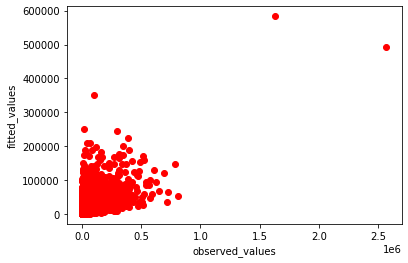

In [43]:
######  Linearity #########
# Observed values VS Fitted values
plt.scatter(df_test.total_revol_bal,Final_pred_n,c="r");plt.xlabel("observed_values");plt.ylabel("fitted_values")

((array([-4.75824922, -4.57597455, -4.4773546 , ...,  4.4773546 ,
          4.57597455,  4.75824922]),
  array([-13.38427393, -11.72256555, -11.03845238, ...,  21.28925778,
          21.53485776,  22.36859135])),
 (0.9506288939881876, 2.51516935102529e-13, 0.9506441912202312))

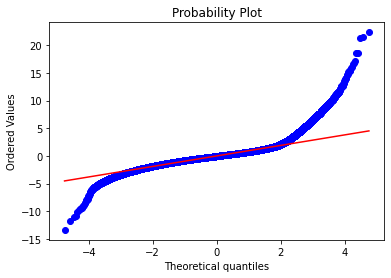

In [46]:
# QQ plot for residuals 
import pylab          
import scipy.stats as st

# Checking Residuals are normally distributed
st.probplot(Final_model.resid_pearson, dist="norm", plot=pylab)
#fig = sm.graphics.abline_plot(model_results=Final_model)